## Plot chains 

Notebook to plot chains run sampler object using chainconsumer. Here we look at the effect of varying the width of the initial distribution and Gaussian prior

In [2]:
import numpy as np
import emcee_sampler
from chainconsumer import ChainConsumer

In [3]:
sampler_single_full = emcee_sampler.EmceeSampler(read_chain_file=1)
sampler_single_prior1 = emcee_sampler.EmceeSampler(read_chain_file=6) ## Prior = 0.2
sampler_single_prior2 = emcee_sampler.EmceeSampler(read_chain_file=7) ## Prior = 0.25

 /home/chris/.local/lib/python3.5/site-packages/paramz/parameterized.py:61: RuntimeWarning:Don't forget to initialize by self.initialize_parameter()!


Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Chain shape is  (265000, 6)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Chain shape is  (255000, 6)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Chain shape is  (255000, 6)


In [4]:
chain_single_full,lnprob_single_full=sampler_single_full.get_chain(cube=False)
chain_single_prior1,lnprob_single=sampler_single_prior1.get_chain(cube=False)
chain_single_prior2,lnprob_single=sampler_single_prior2.get_chain(cube=False)

In [11]:
## Function for prior
sigma=0.15
sigma1=0.2
sigma2=0.25
def prior(x):
    return (1/np.sqrt(2*np.pi*sigma**2))*np.exp(-(x-1)**2/(2*sigma**2))
def prior1(x):
    return (1/np.sqrt(2*np.pi*sigma1**2))*np.exp(-(x-1)**2/(2*sigma1**2))
def prior2(x):
    return (1/np.sqrt(2*np.pi*sigma2**2))*np.exp(-(x-1)**2/(2*sigma2**2))
    

In [16]:
## Generate prior data
x=np.linspace(0.5,1.5,500)
y=prior(x)
y1=prior1(x)
y2=prior2(x)

prior_alpha=0.2

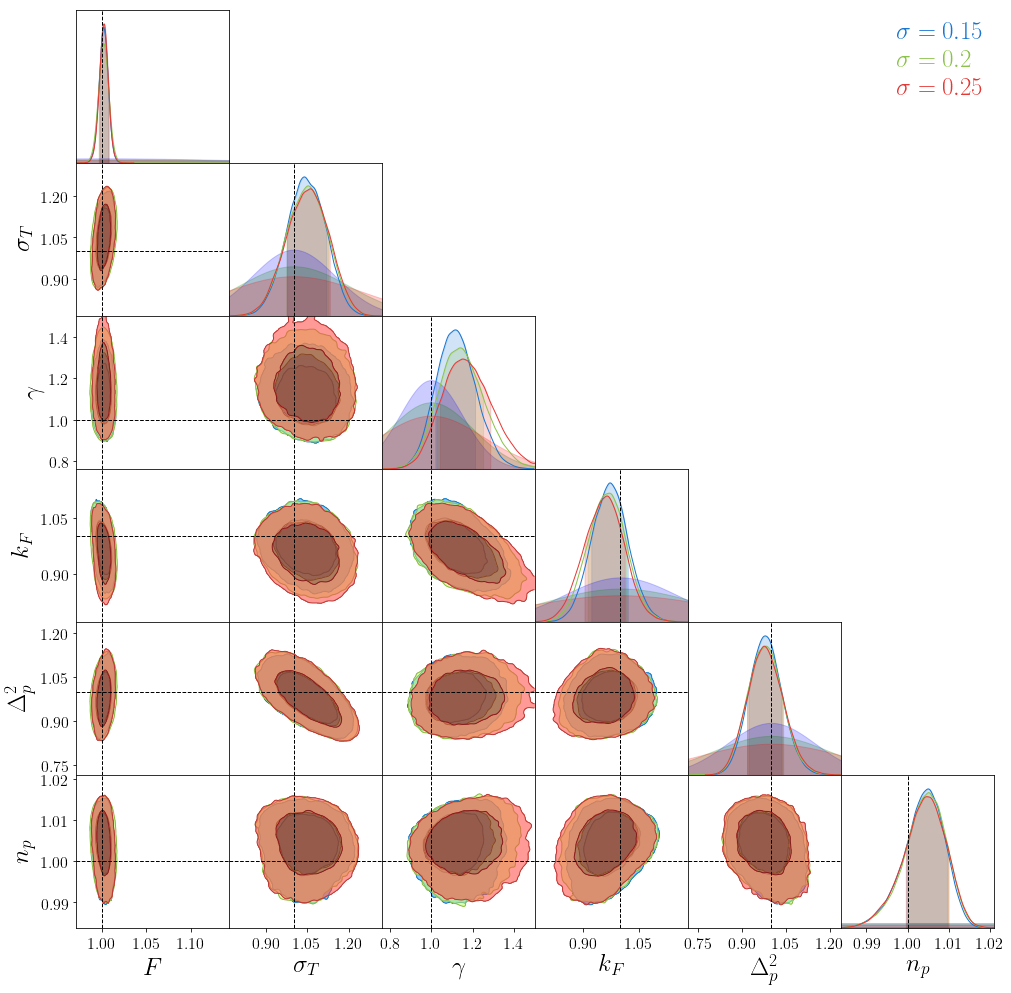

In [17]:
c=ChainConsumer()
c.add_chain(chain_single_full,parameters=sampler_single_full.paramstrings,name=r"$\sigma=0.15$")
c.add_chain(chain_single_prior1,parameters=sampler_single_prior1.paramstrings,name=r"$\sigma=0.2$")
c.add_chain(chain_single_prior2,parameters=sampler_single_prior2.paramstrings,name=r"$\sigma=0.25$")
c.configure(diagonal_tick_labels=False, tick_font_size=16, label_font_size=25, max_ticks=4)
fig = c.plotter.plot(figsize=(15,15),truth=sampler_single_full.truth)
fig.axes[0].fill_between(x,0,y,linestyle="solid",color="blue",alpha=prior_alpha)
fig.axes[7].fill_between(x,0,y,linestyle="solid",color="blue",alpha=prior_alpha)
fig.axes[14].fill_between(x,0,y,linestyle="solid",color="blue",alpha=prior_alpha)
fig.axes[21].fill_between(x,0,y,linestyle="solid",color="blue",alpha=prior_alpha)
fig.axes[28].fill_between(x,0,y,linestyle="solid",color="blue",alpha=prior_alpha)
fig.axes[35].fill_between(x,0,y,linestyle="solid",color="blue",alpha=prior_alpha)
fig.axes[0].fill_between(x,0,y1,linestyle="solid",color="green",alpha=prior_alpha)
fig.axes[7].fill_between(x,0,y1,linestyle="solid",color="green",alpha=prior_alpha)
fig.axes[14].fill_between(x,0,y1,linestyle="solid",color="green",alpha=prior_alpha)
fig.axes[21].fill_between(x,0,y1,linestyle="solid",color="green",alpha=prior_alpha)
fig.axes[28].fill_between(x,0,y1,linestyle="solid",color="green",alpha=prior_alpha)
fig.axes[35].fill_between(x,0,y1,linestyle="solid",color="green",alpha=prior_alpha)
fig.axes[0].fill_between(x,0,y2,linestyle="solid",color="red",alpha=prior_alpha)
fig.axes[7].fill_between(x,0,y2,linestyle="solid",color="red",alpha=prior_alpha)
fig.axes[14].fill_between(x,0,y2,linestyle="solid",color="red",alpha=prior_alpha)
fig.axes[21].fill_between(x,0,y2,linestyle="solid",color="red",alpha=prior_alpha)
fig.axes[28].fill_between(x,0,y2,linestyle="solid",color="red",alpha=prior_alpha)
fig.axes[35].fill_between(x,0,y2,linestyle="solid",color="red",alpha=prior_alpha)
fig.show()